In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [4]:
import pandas as pd

df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]

In [5]:

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
import numpy as np
X = np.array(df.drop(["ans"], axis=1))
y = df["ans"]

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4,random_state=42)

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [32]:
y_pred = clf.predict(X_test)

In [33]:

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

print("accuracy: ", round(accuracy_score(y_test, y_pred),2))
print(classification_report(y_test, y_pred))

accuracy:  0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.97        15
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



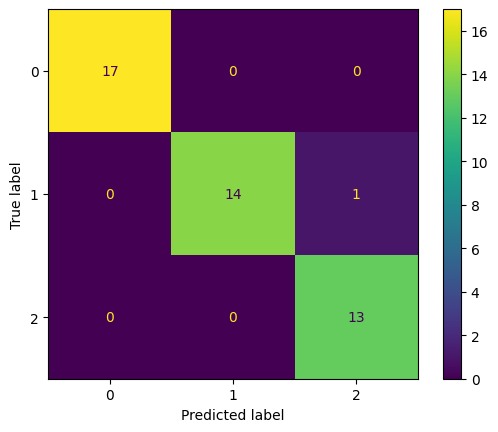

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

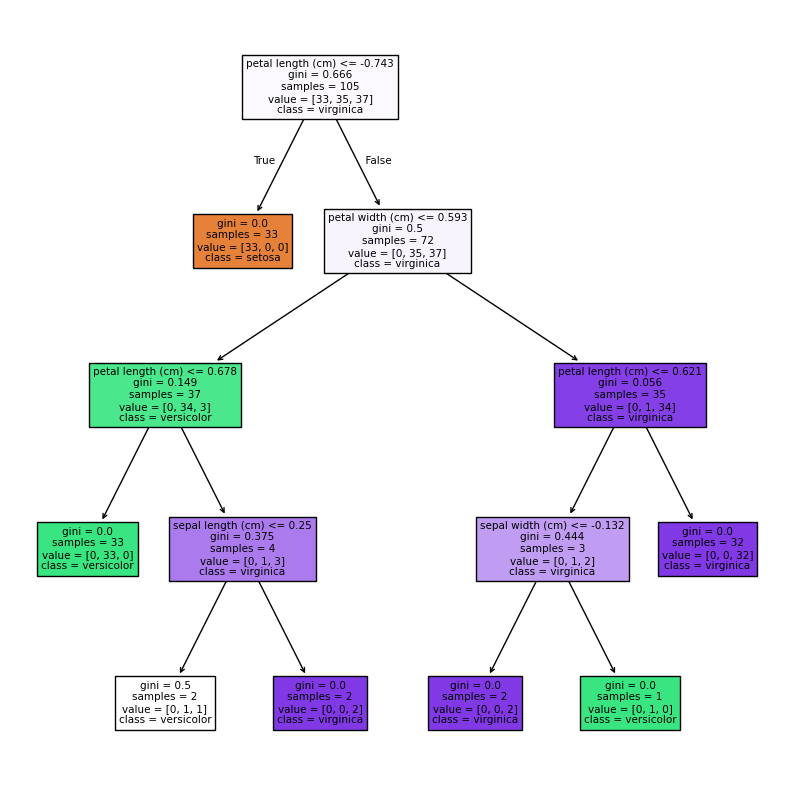

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)
plt.show()

**ONE RULE BASED ALGORITHM**

In [37]:

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

for col in data.feature_names:
    df[col] = pd.cut(df[col], bins=5, labels=False)

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

def oneR(train_df, target_col):
    best_feature = None
    best_accuracy = 0
    best_rule = {}

    for feature in train_df.columns:
        if feature == target_col:
            continue

        rule = {}
        for val in train_df[feature].unique():
            most_common_class = (
                train_df[train_df[feature] == val][target_col].mode()[0]
            )
            rule[val] = most_common_class

        # Predict on training data using this rule
        preds = train_df[feature].map(rule)
        acc = accuracy_score(train_df[target_col], preds)

        if acc > best_accuracy:
            best_accuracy = acc
            best_feature = feature
            best_rule = rule

    return best_feature, best_rule, best_accuracy

best_feature, best_rule, best_acc = oneR(train_df, 'target')

print(f"🏆 Best Feature: {best_feature}")
print(f"📜 Rule: {best_rule}")
print(f"✅ Training Accuracy: {best_acc:.2f}")

test_preds = test_df[best_feature].map(best_rule)

test_preds = test_preds.fillna(train_df['target'].mode()[0])

print("\n✅ Test Accuracy:", round(accuracy_score(test_df['target'], test_preds),2))
print("\n📊 Classification Report:\n", classification_report(test_df['target'], test_preds))

🏆 Best Feature: flavanoids
📜 Rule: {np.int64(0): np.int64(2), np.int64(1): np.int64(1), np.int64(2): np.int64(0), np.int64(3): np.int64(0), np.int64(4): np.int64(1)}
✅ Training Accuracy: 0.79

✅ Test Accuracy: 0.8

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       0.86      0.57      0.69        21
           2       0.86      0.86      0.86        14

    accuracy                           0.80        54
   macro avg       0.82      0.81      0.80        54
weighted avg       0.81      0.80      0.79        54

